Copyright (C) 1997-2009 The R Core Team

In [1]:
### Helical Valley Function
### Page 362 Dennis + Schnabel

require(stats); require(graphics)

List of 6
 $ minimum   : num 1.24e-14
 $ estimate  : num [1:3] 1.00 3.07e-09 -6.06e-09
 $ gradient  : num [1:3] -3.76e-07 3.49e-06 -2.20e-06
 $ hessian   : num [1:3, 1:3] 2.00e+02 -4.07e-02 9.77e-07 -4.07e-02 5.07e+02 ...
 $ code      : int 2
 $ iterations: int 27


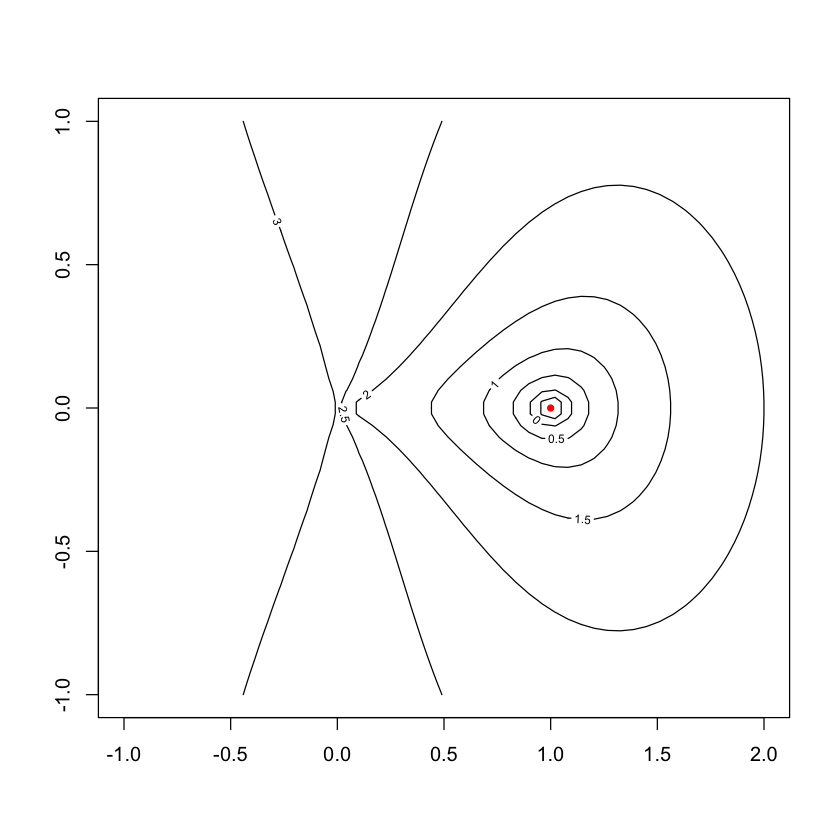

In [2]:
theta <- function(x1,x2) (atan(x2/x1) + (if(x1 <= 0) pi else 0))/ (2*pi)
## but this is easier :
theta <- function(x1,x2) atan2(x2, x1)/(2*pi)

f <- function(x) {
    f1 <- 10*(x[3] - 10*theta(x[1],x[2]))
    f2 <- 10*(sqrt(x[1]^2+x[2]^2)-1)
    f3 <- x[3]
    return(f1^2+f2^2+f3^2)
}

## explore surface {at x3 = 0}
x <- seq(-1, 2, length.out=50)
y <- seq(-1, 1, length.out=50)
z <- apply(as.matrix(expand.grid(x, y)), 1, function(x) f(c(x, 0)))
contour(x, y, matrix(log10(z), 50, 50))
str(nlm.f <- nlm(f, c(-1,0,0), hessian = TRUE))
points(rbind(nlm.f$estim[1:2]), col = "red", pch = 20)

List of 6
 $ minimum   : num 3.97e-12
 $ estimate  : num [1:2] 1 1
 $ gradient  : num [1:2] -6.54e-07 3.34e-07
 $ hessian   : num [1:2, 1:2] 802 -400 -400 200
 $ code      : int 1
 $ iterations: int 23


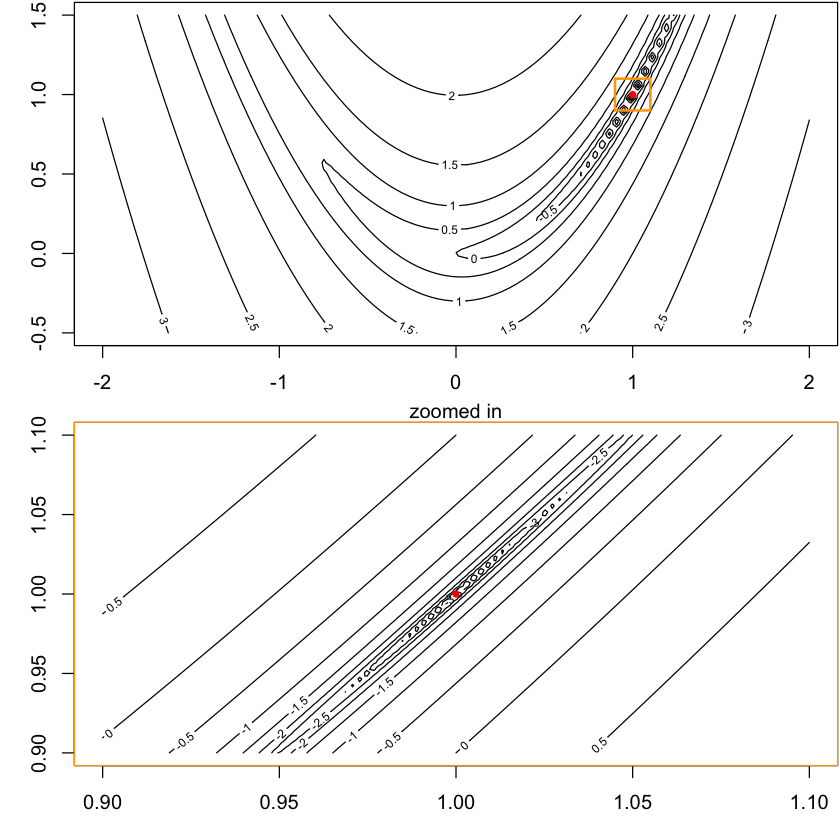

In [3]:
### the Rosenbrock banana valley function

fR <- function(x)
{
    x1 <- x[1]; x2 <- x[2]
    100*(x2 - x1*x1)^2 + (1-x1)^2
}

## explore surface
fx <- function(x)
{   ## `vectorized' version of fR()
    x1 <- x[,1]; x2 <- x[,2]
    100*(x2 - x1*x1)^2 + (1-x1)^2
}
x <- seq(-2, 2, length.out=100)
y <- seq(-0.5, 1.5, length.out=100)
z <- fx(expand.grid(x, y))
op <- par(mfrow = c(2,1), mar = 0.1 + c(3,3,0,0))
contour(x, y, matrix(log10(z), length(x)))

str(nlm.f2 <- nlm(fR, c(-1.2, 1), hessian = TRUE))
points(rbind(nlm.f2$estim[1:2]), col = "red", pch = 20)

## Zoom in :
rect(0.9, 0.9, 1.1, 1.1, border = "orange", lwd = 2)
x <- y <- seq(0.9, 1.1, length.out=100)
z <- fx(expand.grid(x, y))
contour(x, y, matrix(log10(z), length(x)))
mtext("zoomed in");box(col = "orange")
points(rbind(nlm.f2$estim[1:2]), col = "red", pch = 20)
par(op)

In [4]:
fg <- function(x)
{
    gr <- function(x1, x2) {
        c(-400*x1*(x2 - x1*x1)-2*(1-x1), 200*(x2 - x1*x1))
    }
    x1 <- x[1]; x2 <- x[2]
    res<- 100*(x2 - x1*x1)^2 + (1-x1)^2
    attr(res, "gradient") <- gr(x1, x2)
    return(res)
}

nlm(fg, c(-1.2, 1), hessian = TRUE)

802.24,-400.02
-400.02,200.00


In [5]:
## or use deriv to find the derivatives

fd <- deriv(~ 100*(x2 - x1*x1)^2 + (1-x1)^2, c("x1", "x2"))
fdd <- function(x1, x2) {}
body(fdd) <- fd
nlm(function(x) fdd(x[1], x[2]), c(-1.2,1), hessian = TRUE)

802.24,-400.02
-400.02,200.00


In [6]:
fgh <- function(x)
{
    gr <- function(x1, x2)
        c(-400*x1*(x2 - x1*x1) - 2*(1-x1), 200*(x2 - x1*x1))
    h <- function(x1, x2) {
        a11 <- 2 - 400*x2 + 1200*x1*x1
        a21 <- -400*x1
        matrix(c(a11, a21, a21, 200), 2, 2)
    }
    x1 <- x[1]; x2 <- x[2]
    res<- 100*(x2 - x1*x1)^2 + (1-x1)^2
    attr(res, "gradient") <- gr(x1, x2)
    attr(res, "hessian") <- h(x1, x2)
    return(res)
}

nlm(fgh, c(-1.2,1), hessian = TRUE)

366.1188,271.4593
271.4593,200.0000
